# 📊 Analisi Demografica HR

Analisi completa della composizione demografica della forza lavoro.

**Data creazione**: 18/07/2025

---

In [1]:
# 📁 SETUP E CARICAMENTO DATI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurazione grafici
plt.style.use('default')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)

# Carica dati con encoding corretto
try:
    df = pd.read_csv('hr_data_con_turnover.csv', encoding='utf-8')
    print(f"Dataset caricato: {len(df)} dipendenti")
    
    # Converti date
    date_columns = ['DateOfBirth', 'HiringDate', 'TerminationDate']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')
    
    # Calcola età e anzianità
    oggi = pd.Timestamp.now()
    if 'DateOfBirth' in df.columns:
        eta_days = (oggi - df['DateOfBirth']).dt.days
        df['Eta'] = (eta_days / 365.25).round().astype('Int64')
    
    if 'HiringDate' in df.columns:
        servizio_days = (oggi - df['HiringDate']).dt.days
        df['AnniServizio'] = (servizio_days / 365.25).round().astype('Int64')
    
    print("Dati preparati per l'analisi!")
    
except UnicodeDecodeError:
    # Fallback con encoding diverso
    try:
        df = pd.read_csv('hr_data_con_turnover.csv', encoding='latin-1')
        print(f"Dataset caricato con encoding latin-1: {len(df)} dipendenti")
        # Ripeti la preparazione dati
        date_columns = ['DateOfBirth', 'HiringDate', 'TerminationDate']
        for col in date_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')
        oggi = pd.Timestamp.now()
        if 'DateOfBirth' in df.columns:
            eta_days = (oggi - df['DateOfBirth']).dt.days
            df['Eta'] = (eta_days / 365.25).round().astype('Int64')
        if 'HiringDate' in df.columns:
            servizio_days = (oggi - df['HiringDate']).dt.days
            df['AnniServizio'] = (servizio_days / 365.25).round().astype('Int64')
        print("Dati preparati per l'analisi!")
    except:
        print("Errore nel caricamento del dataset")
        df = None
except Exception as e:
    print(f"Errore: {e}")
    df = None

Dataset caricato: 250 dipendenti
Dati preparati per l'analisi!


In [2]:
# 📊 VERIFICA DATI CARICATI
if 'df' in globals() and df is not None:
    print(f"✅ Dataset già caricato: {len(df)} dipendenti")
    print(f"📋 Colonne disponibili: {list(df.columns)}")
    
    # Verifica colonne essenziali
    colonne_essenziali = ['Eta', 'AnniServizio', 'Department', 'Position']
    colonne_mancanti = [col for col in colonne_essenziali if col not in df.columns]
    
    if colonne_mancanti:
        print(f"⚠️  Colonne mancanti: {colonne_mancanti}")
    else:
        print("✅ Tutte le colonne essenziali sono presenti!")
        
    # Mostra statistiche rapide
    print(f"\n📈 STATISTICHE RAPIDE:")
    print(f"   👥 Dipendenti totali: {len(df)}")
    if 'Eta' in df.columns:
        print(f"   🎂 Età media: {df['Eta'].mean():.1f} anni")
    if 'AnniServizio' in df.columns:
        print(f"   ⏰ Anzianità media: {df['AnniServizio'].mean():.1f} anni")
    if 'Department' in df.columns:
        print(f"   🏢 Dipartimenti: {df['Department'].nunique()}")
        
else:
    print("❌ Dataset non caricato! Esegui prima la cella di setup.")

✅ Dataset già caricato: 250 dipendenti
📋 Colonne disponibili: ['EmployeeID', 'EmployeeName', 'Gender', 'EmploymentStatus', 'Salary', 'Department', 'DateOfBirth', 'HiringDate', 'TerminationDate', 'State', 'MaritalStatus', 'Position', 'RecruitmentSource', 'PerformanceScore', 'Eta', 'AnniServizio']
✅ Tutte le colonne essenziali sono presenti!

📈 STATISTICHE RAPIDE:
   👥 Dipendenti totali: 250
   🎂 Età media: 51.6 anni
   ⏰ Anzianità media: 10.1 anni
   🏢 Dipartimenti: 6


In [3]:

# 📁 Importazione dati dal dashboard principale
# Esegui prima il dashboard principale per caricare i dati

try:
    # Verifica se i dati sono già caricati
    if 'df' in globals():
        print(f"✅ Dati già disponibili: {len(df)} dipendenti")
    else:
        # Carica i dati direttamente
        exec(open('carica_dati_hr.py').read())
        print(f"✅ Dati caricati: {len(df)} dipendenti")
except:
    print("⚠️  Esegui prima il dashboard principale (00_HR_Dashboard_Principale.ipynb)")
    print("   oppure carica manualmente i dati HR")


✅ Dati già disponibili: 250 dipendenti



## 👥 Analisi Composizione per Genere

Analisi dettagliata dell'equilibrio di genere nella forza lavoro.


In [4]:

# 👥 ANALISI COMPOSIZIONE PER GENERE
if df is not None:
    print("👥 ANALISI DEMOGRAFICA - COMPOSIZIONE PER GENERE")
    print("=" * 55)
    
    # Filtra dipendenti attivi se presente la colonna status
    if 'EmploymentStatus' in df.columns:
        df_attivi = df[df['EmploymentStatus'] == 'Active']
        print(f"📊 Analisi su {len(df_attivi)} dipendenti attivi")
        df_analisi = df_attivi
    else:
        df_analisi = df
        print(f"📊 Analisi su {len(df_analisi)} dipendenti totali")
    
    if 'Gender' in df_analisi.columns:
        gender_counts = df_analisi['Gender'].value_counts()
        total_employees = len(df_analisi)
        
        print(f"\n👥 **DISTRIBUZIONE PER GENERE:**")
        for gender, count in gender_counts.items():
            pct = count / total_employees * 100
            gender_label = "🚹 Uomini" if gender == 'M' else "🚺 Donne"
            print(f"   • {gender_label}: {count:,} dipendenti ({pct:.1f}%)")
        
        # Calcola equilibrio di genere
        if len(gender_counts) >= 2:
            male_pct = gender_counts.get('M', 0) / total_employees * 100
            female_pct = gender_counts.get('F', 0) / total_employees * 100
            gap = abs(male_pct - female_pct)
            
            print(f"\n⚖️  **ANALISI EQUILIBRIO DI GENERE:**")
            print(f"   • Differenza: {gap:.1f} punti percentuali")
            
            if gap <= 10:
                print(f"   ✅ **EQUILIBRIO OTTIMO**: Distribuzione molto bilanciata")
                print(f"      → Mantenere l'equilibrio attuale nelle nuove assunzioni")
            elif gap <= 20:
                print(f"   📊 **EQUILIBRIO ACCETTABILE**: Leggero sbilanciamento")
                majority = "uomini" if male_pct > female_pct else "donne"
                minority = "donne" if male_pct > female_pct else "uomini"
                print(f"      → Leggera prevalenza di {majority}")
                print(f"      → Considerare azioni per attrarre più {minority}")
            else:
                print(f"   ⚠️  **SQUILIBRIO SIGNIFICATIVO**: Forte sbilanciamento")
                majority = "uomini" if male_pct > female_pct else "donne"
                minority = "donne" if male_pct > female_pct else "uomini"
                print(f"      → Forte prevalenza di {majority} ({max(male_pct, female_pct):.1f}%)")
                print(f"      → Azioni urgenti per diversificare e attrarre {minority}")
        
        # Analisi per dipartimento
        if 'Department' in df_analisi.columns:
            print(f"\n🏢 **DISTRIBUZIONE GENERE PER DIPARTIMENTO:**")
            
            dept_gender_analysis = []
            for dept in df_analisi['Department'].unique():
                dept_df = df_analisi[df_analisi['Department'] == dept]
                dept_total = len(dept_df)
                
                if dept_total > 0:
                    dept_male = len(dept_df[dept_df['Gender'] == 'M'])
                    dept_female = len(dept_df[dept_df['Gender'] == 'F'])
                    male_pct_dept = dept_male / dept_total * 100
                    female_pct_dept = dept_female / dept_total * 100
                    
                    dept_gender_analysis.append({
                        'Dipartimento': dept,
                        'Totale': dept_total,
                        'Uomini': dept_male,
                        'Donne': dept_female,
                        'Uomini%': male_pct_dept,
                        'Donne%': female_pct_dept,
                        'Gap': abs(male_pct_dept - female_pct_dept)
                    })
            
            # Ordina per gap decrescente
            dept_gender_analysis.sort(key=lambda x: x['Gap'], reverse=True)
            
            for dept in dept_gender_analysis:
                gap_icon = "🚨" if dept['Gap'] > 70 else "⚠️" if dept['Gap'] > 50 else "📊" if dept['Gap'] > 30 else "✅"
                print(f"   {gap_icon} **{dept['Dipartimento']}**: {dept['Uomini']}M/{dept['Donne']}F ({dept['Uomini%']:.0f}%/{dept['Donne%']:.0f}%)")
            
            # Identifica dipartimenti con squilibri estremi
            dept_critici = [d for d in dept_gender_analysis if d['Gap'] > 70]
            if dept_critici:
                print(f"\n🚨 **DIPARTIMENTI CON SQUILIBRIO ESTREMO** (>70% gap):")
                for dept in dept_critici:
                    majority = "maschile" if dept['Uomini%'] > dept['Donne%'] else "femminile"
                    print(f"   • {dept['Dipartimento']}: Dominanza {majority} ({max(dept['Uomini%'], dept['Donne%']):.0f}%)")
                print(f"   → Priorità per azioni di diversificazione")
    else:
        print("ℹ️  Colonna 'Gender' non trovata nel dataset")


👥 ANALISI DEMOGRAFICA - COMPOSIZIONE PER GENERE
📊 Analisi su 150 dipendenti attivi

👥 **DISTRIBUZIONE PER GENERE:**
   • 🚹 Uomini: 105 dipendenti (70.0%)
   • 🚺 Donne: 45 dipendenti (30.0%)

⚖️  **ANALISI EQUILIBRIO DI GENERE:**
   • Differenza: 40.0 punti percentuali
   ⚠️  **SQUILIBRIO SIGNIFICATIVO**: Forte sbilanciamento
      → Forte prevalenza di uomini (70.0%)
      → Azioni urgenti per diversificare e attrarre donne

🏢 **DISTRIBUZIONE GENERE PER DIPARTIMENTO:**
   ⚠️ **Amministrazione**: 21M/4F (84%/16%)
   📊 **Produzione**: 30M/11F (73%/27%)
   📊 **Vendite**: 28M/15F (65%/35%)
   ✅ **IT**: 26M/15F (63%/37%)



## 🎂 Analisi Distribuzione per Età

Composizione anagrafica e fasce generazionali della forza lavoro.


In [5]:

# 🎂 ANALISI DISTRIBUZIONE PER ETÀ
if df is not None and 'Eta' in df.columns:
    
    print("🎂 ANALISI DEMOGRAFICA - DISTRIBUZIONE PER ETÀ")
    print("=" * 50)
    
    # Usa df_analisi dalla sezione precedente (attivi o totali)
    if 'df_analisi' not in locals():
        df_analisi = df[df['EmploymentStatus'] == 'Active'] if 'EmploymentStatus' in df.columns else df
    
    eta_stats = df_analisi['Eta'].describe()
    
    print(f"📊 **STATISTICHE ETÀ:**")
    print(f"   • Età media: {eta_stats['mean']:.1f} anni")
    print(f"   • Età mediana: {eta_stats['50%']:.1f} anni")
    print(f"   • Range: {eta_stats['min']:.0f}-{eta_stats['max']:.0f} anni")
    print(f"   • Deviazione standard: {eta_stats['std']:.1f} anni")
    
    # Analisi per fasce generazionali
    fasce_generazionali = {
        'Gen Z (< 27)': len(df_analisi[df_analisi['Eta'] < 27]),
        'Millennials (27-42)': len(df_analisi[(df_analisi['Eta'] >= 27) & (df_analisi['Eta'] <= 42)]),
        'Gen X (43-58)': len(df_analisi[(df_analisi['Eta'] >= 43) & (df_analisi['Eta'] <= 58)]),
        'Baby Boomers (> 58)': len(df_analisi[df_analisi['Eta'] > 58])
    }
    
    print(f"\n👥 **DISTRIBUZIONE PER GENERAZIONI:**")
    total_employees = len(df_analisi)
    for generazione, count in fasce_generazionali.items():
        pct = count / total_employees * 100
        print(f"   • {generazione}: {count:,} dipendenti ({pct:.1f}%)")
    
    # Identifica la generazione dominante
    gen_dominante = max(fasce_generazionali.items(), key=lambda x: x[1])
    pct_dominante = gen_dominante[1] / total_employees * 100
    
    print(f"\n🎯 **ANALISI COMPOSIZIONE GENERAZIONALE:**")
    print(f"   • **Generazione dominante**: {gen_dominante[0]} ({pct_dominante:.1f}%)")
    
    # Raccomandazioni basate sulla composizione
    if pct_dominante > 50:
        print(f"   ⚠️  **CONCENTRAZIONE ELEVATA**: Una generazione domina oltre il 50%")
        print(f"      → Rischio di pensiero omogeneo e gap generazionale")
        print(f"      → Diversificare il recruiting per età")
    elif pct_dominante > 40:
        print(f"   📊 **CONCENTRAZIONE MODERATA**: Generazione prevalente ma non eccessiva")
        print(f"      → Monitorare l'equilibrio nelle nuove assunzioni")
    else:
        print(f"   ✅ **DISTRIBUZIONE EQUILIBRATA**: Buon mix generazionale")
        print(f"      → Mantenere la diversità anagrafica attuale")
    
    # Analisi per fasce di età specifiche
    fasce_eta_dettagliate = {
        'Giovani (< 30)': len(df_analisi[df_analisi['Eta'] < 30]),
        'Adulti Giovani (30-40)': len(df_analisi[(df_analisi['Eta'] >= 30) & (df_analisi['Eta'] < 40)]),
        'Adulti Maturi (40-50)': len(df_analisi[(df_analisi['Eta'] >= 40) & (df_analisi['Eta'] < 50)]),
        'Senior (50-60)': len(df_analisi[(df_analisi['Eta'] >= 50) & (df_analisi['Eta'] < 60)]),
        'Pre-pensione (≥ 60)': len(df_analisi[df_analisi['Eta'] >= 60])
    }
    
    print(f"\n📊 **DISTRIBUZIONE PER FASCE D'ETÀ DETTAGLIATE:**")
    for fascia, count in fasce_eta_dettagliate.items():
        pct = count / total_employees * 100
        status_icon = "🚨" if "Pre-pensione" in fascia and pct > 20 else "⚠️" if "Senior" in fascia and pct > 25 else "📊"
        print(f"   {status_icon} {fascia}: {count:,} dipendenti ({pct:.1f}%)")
    
    # Alert per situazioni critiche
    giovani_pct = fasce_eta_dettagliate['Giovani (< 30)'] / total_employees * 100
    prepensione_pct = fasce_eta_dettagliate['Pre-pensione (≥ 60)'] / total_employees * 100
    
    print(f"\n🎯 **ALERT E RACCOMANDAZIONI:**")
    
    if giovani_pct < 15:
        print(f"   📈 **CARENZA GIOVANI TALENTI**: Solo {giovani_pct:.1f}% under 30")
        print(f"      → Intensificare recruiting universitario e graduate programs")
        print(f"      → Migliorare employer branding per giovani")
    
    if prepensione_pct > 15:
        print(f"   🏖️ **ALTO RISCHIO PENSIONAMENTI**: {prepensione_pct:.1f}% over 60")
        print(f"      → Pianificazione urgente della successione")
        print(f"      → Programmi di knowledge transfer")
    
    # Analisi età per genere
    if 'Gender' in df_analisi.columns:
        print(f"\n⚖️  **ETÀ MEDIA PER GENERE:**")
        for gender in ['M', 'F']:
            gender_label = "Uomini" if gender == 'M' else "Donne"
            gender_df = df_analisi[df_analisi['Gender'] == gender]
            if len(gender_df) > 0:
                eta_media_gender = gender_df['Eta'].mean()
                print(f"   • {gender_label}: {eta_media_gender:.1f} anni")
        
        # Confronto età media
        eta_m = df_analisi[df_analisi['Gender'] == 'M']['Eta'].mean()
        eta_f = df_analisi[df_analisi['Gender'] == 'F']['Eta'].mean()
        if not pd.isna(eta_m) and not pd.isna(eta_f):
            diff_eta = abs(eta_m - eta_f)
            print(f"   • Differenza: {diff_eta:.1f} anni")
            if diff_eta > 5:
                older_gender = "uomini" if eta_m > eta_f else "donne"
                print(f"   → {older_gender.capitalize()} significativamente più anziani")
else:
    print("ℹ️  Colonna 'Eta' non trovata. Calcolare l'età dai dati di nascita.")


🎂 ANALISI DEMOGRAFICA - DISTRIBUZIONE PER ETÀ
📊 **STATISTICHE ETÀ:**
   • Età media: 51.9 anni
   • Età mediana: 52.0 anni
   • Range: 36-66 anni
   • Deviazione standard: 9.0 anni

👥 **DISTRIBUZIONE PER GENERAZIONI:**
   • Gen Z (< 27): 0 dipendenti (0.0%)
   • Millennials (27-42): 23 dipendenti (15.3%)
   • Gen X (43-58): 78 dipendenti (52.0%)
   • Baby Boomers (> 58): 49 dipendenti (32.7%)

🎯 **ANALISI COMPOSIZIONE GENERAZIONALE:**
   • **Generazione dominante**: Gen X (43-58) (52.0%)
   ⚠️  **CONCENTRAZIONE ELEVATA**: Una generazione domina oltre il 50%
      → Rischio di pensiero omogeneo e gap generazionale
      → Diversificare il recruiting per età

📊 **DISTRIBUZIONE PER FASCE D'ETÀ DETTAGLIATE:**
   📊 Giovani (< 30): 0 dipendenti (0.0%)
   📊 Adulti Giovani (30-40): 16 dipendenti (10.7%)
   📊 Adulti Maturi (40-50): 53 dipendenti (35.3%)
   ⚠️ Senior (50-60): 41 dipendenti (27.3%)
   🚨 Pre-pensione (≥ 60): 40 dipendenti (26.7%)

🎯 **ALERT E RACCOMANDAZIONI:**
   📈 **CARENZA GIOV


## 💍 Analisi Stato Civile e Demografia Estesa

Analisi dello stato civile e altre caratteristiche demografiche.


In [6]:

# 💍 ANALISI STATO CIVILE E DEMOGRAFIA ESTESA
if df is not None:
    
    print("💍 ANALISI DEMOGRAFICA - STATO CIVILE E CARATTERISTICHE")
    print("=" * 60)
    
    # Usa df_analisi dalla sezione precedente
    if 'df_analisi' not in locals():
        df_analisi = df[df['EmploymentStatus'] == 'Active'] if 'EmploymentStatus' in df.columns else df
    
    total_employees = len(df_analisi)
    
    # Analisi stato civile
    if 'MaritalStatus' in df_analisi.columns:
        marital_counts = df_analisi['MaritalStatus'].value_counts()
        
        print(f"💍 **DISTRIBUZIONE STATO CIVILE:**")
        for status, count in marital_counts.items():
            pct = count / total_employees * 100
            status_icon = "💑" if status == "Married" else "👤" if status == "Single" else "💔" if status == "Divorced" else "🖤"
            status_label = {
                'Married': 'Sposati',
                'Single': 'Single', 
                'Divorced': 'Divorziati',
                'Widowed': 'Vedovi'
            }.get(status, status)
            print(f"   {status_icon} {status_label}: {count:,} dipendenti ({pct:.1f}%)")
        
        # Analisi stato civile per genere
        if 'Gender' in df_analisi.columns:
            print(f"\n⚖️  **STATO CIVILE PER GENERE:**")
            
            for gender in ['M', 'F']:
                gender_label = "🚹 Uomini" if gender == 'M' else "🚺 Donne"
                gender_df = df_analisi[df_analisi['Gender'] == gender]
                
                if len(gender_df) > 0:
                    print(f"\n   {gender_label}:")
                    gender_marital = gender_df['MaritalStatus'].value_counts()
                    
                    for status, count in gender_marital.items():
                        pct = count / len(gender_df) * 100
                        status_label = {
                            'Married': 'Sposati',
                            'Single': 'Single',
                            'Divorced': 'Divorziati', 
                            'Widowed': 'Vedovi'
                        }.get(status, status)
                        print(f"      • {status_label}: {count} ({pct:.1f}%)")
        
        # Analisi stato civile per età
        if 'Eta' in df_analisi.columns:
            print(f"\n🎂 **ETÀ MEDIA PER STATO CIVILE:**")
            for status in marital_counts.index:
                status_df = df_analisi[df_analisi['MaritalStatus'] == status]
                if len(status_df) > 0:
                    eta_media = status_df['Eta'].mean()
                    status_label = {
                        'Married': 'Sposati',
                        'Single': 'Single',
                        'Divorced': 'Divorziati',
                        'Widowed': 'Vedovi'
                    }.get(status, status)
                    print(f"   • {status_label}: {eta_media:.1f} anni")
    
    # Analisi posizioni lavorative
    if 'Position' in df_analisi.columns:
        position_counts = df_analisi['Position'].value_counts()
        
        print(f"\n💼 **DISTRIBUZIONE POSIZIONI LAVORATIVE:**")
        for position, count in position_counts.head(8).items():  # Top 8 posizioni
            pct = count / total_employees * 100
            print(f"   • {position}: {count:,} dipendenti ({pct:.1f}%)")
        
        # Analisi posizioni per genere
        if 'Gender' in df_analisi.columns:
            print(f"\n⚖️  **POSIZIONI PER GENERE (Top 5):**")
            
            for position in position_counts.head(5).index:
                position_df = df_analisi[df_analisi['Position'] == position]
                position_total = len(position_df)
                
                if position_total > 0:
                    male_count = len(position_df[position_df['Gender'] == 'M'])
                    female_count = len(position_df[position_df['Gender'] == 'F'])
                    male_pct = male_count / position_total * 100
                    female_pct = female_count / position_total * 100
                    
                    gap = abs(male_pct - female_pct)
                    gap_icon = "🚨" if gap > 70 else "⚠️" if gap > 50 else "📊" if gap > 30 else "✅"
                    
                    print(f"   {gap_icon} **{position}**: {male_count}M/{female_count}F ({male_pct:.0f}%/{female_pct:.0f}%)")
    
    # Analisi fonte di reclutamento
    if 'RecruitmentSource' in df_analisi.columns:
        recruitment_counts = df_analisi['RecruitmentSource'].value_counts()
        
        print(f"\n📢 **FONTI DI RECLUTAMENTO:**")
        for source, count in recruitment_counts.items():
            pct = count / total_employees * 100
            print(f"   • {source}: {count:,} dipendenti ({pct:.1f}%)")
        
        # Identifica la fonte principale
        fonte_principale = recruitment_counts.index[0]
        pct_principale = recruitment_counts.iloc[0] / total_employees * 100
        
        print(f"\n🎯 **ANALISI RECRUITING:**")
        print(f"   • **Fonte principale**: {fonte_principale} ({pct_principale:.1f}%)")
        
        if pct_principale > 50:
            print(f"   ⚠️  **DIPENDENZA ECCESSIVA**: Una fonte domina oltre il 50%")
            print(f"      → Diversificare i canali di recruiting")
        else:
            print(f"   ✅ **DIVERSIFICAZIONE BUONA**: Fonti di recruiting bilanciate")
    
    print(f"\n💡 **RACCOMANDAZIONI DEMOGRAFICHE GENERALI:**")
    print(f"   • Monitorare equilibrio di genere nelle nuove assunzioni")
    print(f"   • Mantenere diversità anagrafica e generazionale")
    print(f"   • Considerare benefit specifici per diverse fasce demografiche")
    print(f"   • Sviluppare programmi di inclusione per tutti i gruppi")


💍 ANALISI DEMOGRAFICA - STATO CIVILE E CARATTERISTICHE
💍 **DISTRIBUZIONE STATO CIVILE:**
   💑 Sposati: 150 dipendenti (100.0%)

⚖️  **STATO CIVILE PER GENERE:**

   🚹 Uomini:
      • Sposati: 105 (100.0%)

   🚺 Donne:
      • Sposati: 45 (100.0%)

🎂 **ETÀ MEDIA PER STATO CIVILE:**
   • Sposati: 51.9 anni

💼 **DISTRIBUZIONE POSIZIONI LAVORATIVE:**
   • Impiegato: 150 dipendenti (100.0%)

⚖️  **POSIZIONI PER GENERE (Top 5):**
   📊 **Impiegato**: 105M/45F (70%/30%)

📢 **FONTI DI RECLUTAMENTO:**
   • LinkedIn: 150 dipendenti (100.0%)

🎯 **ANALISI RECRUITING:**
   • **Fonte principale**: LinkedIn (100.0%)
   ⚠️  **DIPENDENZA ECCESSIVA**: Una fonte domina oltre il 50%
      → Diversificare i canali di recruiting

💡 **RACCOMANDAZIONI DEMOGRAFICHE GENERALI:**
   • Monitorare equilibrio di genere nelle nuove assunzioni
   • Mantenere diversità anagrafica e generazionale
   • Considerare benefit specifici per diverse fasce demografiche
   • Sviluppare programmi di inclusione per tutti i gruppi



## 📊 Visualizzazioni Demografiche

Dashboard visuale della composizione demografica aziendale.


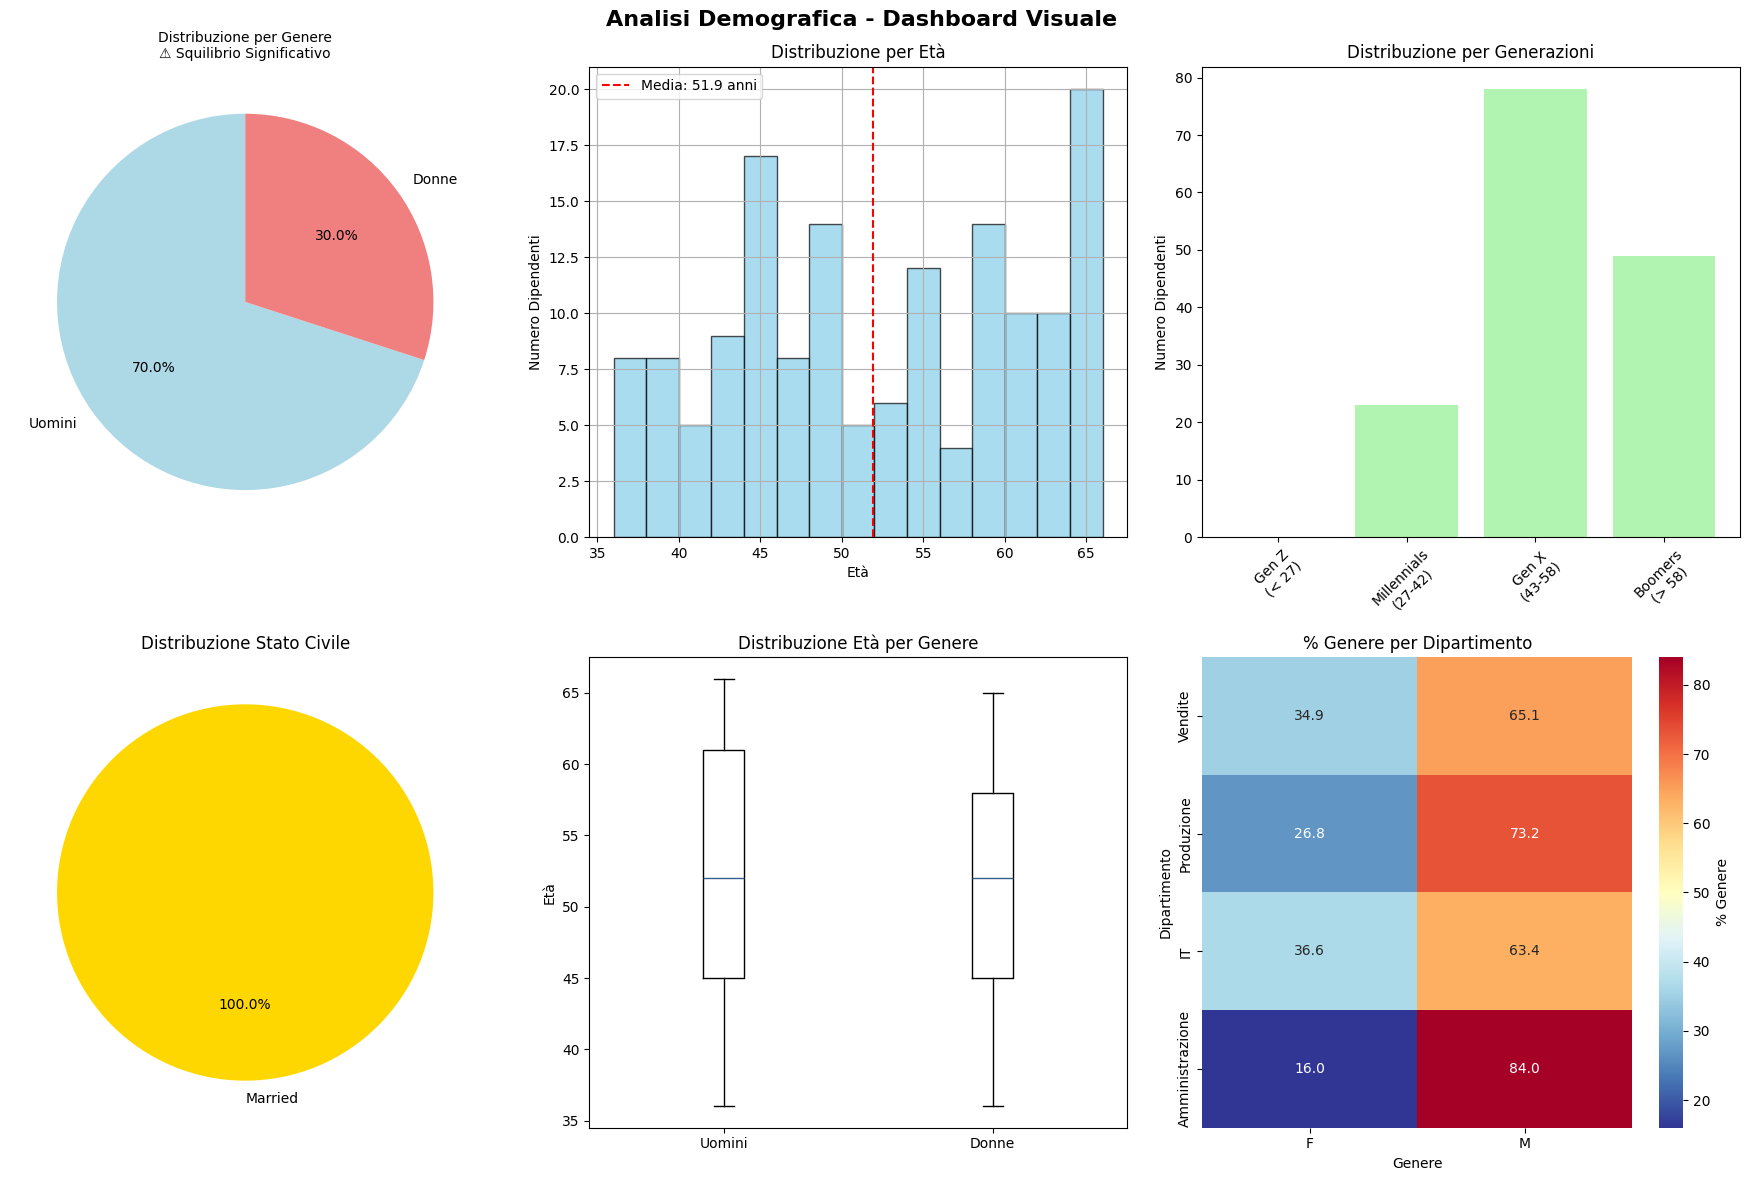


🎯 Dashboard demografico completato!
📊 Utilizzare questi grafici per presentazioni e analisi approfondite


In [7]:

# 📊 VISUALIZZAZIONI DEMOGRAFICHE
if df is not None:
    
    # Usa df_analisi dalla sezione precedente
    if 'df_analisi' not in locals():
        df_analisi = df[df['EmploymentStatus'] == 'Active'] if 'EmploymentStatus' in df.columns else df
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Analisi Demografica - Dashboard Visuale', fontsize=16, fontweight='bold')
    
    # Grafico 1: Distribuzione per genere
    if 'Gender' in df_analisi.columns:
        gender_counts = df_analisi['Gender'].value_counts()
        colors = ['lightblue', 'lightcoral']
        labels = ['Uomini' if x == 'M' else 'Donne' for x in gender_counts.index]
        
        wedges, texts, autotexts = axes[0,0].pie(gender_counts.values, labels=labels, autopct='%1.1f%%', 
                                                 startangle=90, colors=colors)
        axes[0,0].set_title('Distribuzione per Genere')
        
        # Evidenzia se c'è squilibrio
        gap = abs(gender_counts.iloc[0] - gender_counts.iloc[1]) / len(df_analisi) * 100
        if gap > 20:
            axes[0,0].set_title('Distribuzione per Genere\n⚠️ Squilibrio Significativo', fontsize=10)
    
    # Grafico 2: Distribuzione per età
    if 'Eta' in df_analisi.columns:
        df_analisi['Eta'].hist(bins=15, ax=axes[0,1], alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,1].axvline(df_analisi['Eta'].mean(), color='red', linestyle='--', 
                         label=f'Media: {df_analisi["Eta"].mean():.1f} anni')
        axes[0,1].set_title('Distribuzione per Età')
        axes[0,1].set_xlabel('Età')
        axes[0,1].set_ylabel('Numero Dipendenti')
        axes[0,1].legend()
    
    # Grafico 3: Fasce generazionali
    if 'Eta' in df_analisi.columns:
        fasce_gen = {
            'Gen Z\n(< 27)': len(df_analisi[df_analisi['Eta'] < 27]),
            'Millennials\n(27-42)': len(df_analisi[(df_analisi['Eta'] >= 27) & (df_analisi['Eta'] <= 42)]),
            'Gen X\n(43-58)': len(df_analisi[(df_analisi['Eta'] >= 43) & (df_analisi['Eta'] <= 58)]),
            'Boomers\n(> 58)': len(df_analisi[df_analisi['Eta'] > 58])
        }
        
        axes[0,2].bar(fasce_gen.keys(), fasce_gen.values(), color='lightgreen', alpha=0.7)
        axes[0,2].set_title('Distribuzione per Generazioni')
        axes[0,2].set_ylabel('Numero Dipendenti')
        axes[0,2].tick_params(axis='x', rotation=45)
    
    # Grafico 4: Stato civile
    if 'MaritalStatus' in df_analisi.columns:
        marital_counts = df_analisi['MaritalStatus'].value_counts()
        colors_marital = ['gold', 'lightcoral', 'lightgray', 'darkgray']
        
        axes[1,0].pie(marital_counts.values, labels=marital_counts.index, autopct='%1.1f%%',
                     startangle=90, colors=colors_marital[:len(marital_counts)])
        axes[1,0].set_title('Distribuzione Stato Civile')
    
    # Grafico 5: Età per genere (boxplot)
    if 'Eta' in df_analisi.columns and 'Gender' in df_analisi.columns:
        gender_data = []
        gender_labels = []
        
        for gender in ['M', 'F']:
            gender_df = df_analisi[df_analisi['Gender'] == gender]
            if len(gender_df) > 0:
                gender_data.append(gender_df['Eta'].dropna())
                gender_labels.append('Uomini' if gender == 'M' else 'Donne')
        
        if gender_data:
            axes[1,1].boxplot(gender_data, labels=gender_labels)
            axes[1,1].set_title('Distribuzione Età per Genere')
            axes[1,1].set_ylabel('Età')
    
    # Grafico 6: Heatmap genere per dipartimento
    if 'Gender' in df_analisi.columns and 'Department' in df_analisi.columns:
        # Crea tabella pivot
        pivot_data = df_analisi.groupby(['Department', 'Gender']).size().unstack(fill_value=0)
        
        # Calcola percentuali
        pivot_pct = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100
        
        # Prendi solo i top 6 dipartimenti
        top_depts = df_analisi['Department'].value_counts().head(6).index
        pivot_pct_top = pivot_pct.loc[top_depts]
        
        import seaborn as sns
        sns.heatmap(pivot_pct_top, annot=True, fmt='.1f', cmap='RdYlBu_r', 
                   ax=axes[1,2], cbar_kws={'label': '% Genere'})
        axes[1,2].set_title('% Genere per Dipartimento')
        axes[1,2].set_xlabel('Genere')
        axes[1,2].set_ylabel('Dipartimento')
    
    plt.tight_layout()
    plt.show()
    
    print("\n🎯 Dashboard demografico completato!")
    print("📊 Utilizzare questi grafici per presentazioni e analisi approfondite")
